slope: 0.036290028818662536 +/- 0.0010895316533301076
intercept: -0.6685190442221344 +/- 0.03255088301801676


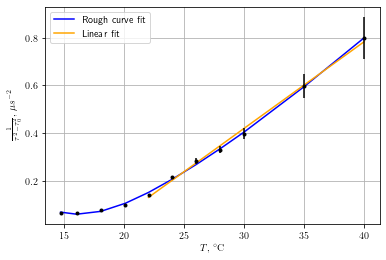

In [6]:



import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
from scipy.stats import linregress
plt = reload(plt)

plt.rcParams['text.usetex'] = True
plt.grid()
plt.xlabel(r'$T,\,^\circ\mathrm{C}$')
plt.ylabel(r'$\frac{1}{\tau^2 - \tau_0^2},\, \mu s^{-2}$')

t = [14.69, 16.03, 18.04, 20.10, 22.02, 24.00, 26.02, 28.02, 30.00, 35.00, 40.00]
t_err = [0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03]

chi = [0.064, 0.067, 0.077, 0.098, 0.140, 0.214, 0.284, 0.330, 0.397, 0.598, 0.799]
chi_err = [0.000653044127203853, 0.000720294455644978,
           0.000931038069919597,
           0.00147328015740595,
           0.00289082737742267,
           0.00664091317784539,
           0.0115737688852923,
           0.0155053506547998,
           0.0223293020912069,
           0.0502455125825626,
           0.0893282357792752
           ]

lin_t = [22.02, 24.00, 26.02, 28.02, 30.00, 35.00, 40.00]
lin_chi = [0.140, 0.214, 0.284, 0.330, 0.397, 0.598, 0.799]

coef = np.polyfit(t, chi, 5)
poly = np.poly1d(coef)

lin_coef = np.polyfit(lin_t, lin_chi, 1)
lin_poly = np.poly1d(lin_coef)

p, V = np.polyfit(lin_t, lin_chi, 1, cov=True)
print("slope: {} +/- {}".format(p[0], np.sqrt(V[0][0])))
print("intercept: {} +/- {}".format(p[1], np.sqrt(V[1][1])))

new_y = poly(t)
lin_new_y = lin_poly(lin_t)

plt.plot(t, new_y, color = 'blue')
plt.plot(lin_t, lin_new_y, color = 'orange')
plt.errorbar(t, chi, xerr = t_err, yerr = chi_err, fmt ='.', color ='black')

#plt.plot(freq_1, volt_1, color = 'orange', marker = '+')
#plt.plot(freq_2, volt_2, color = 'blue', marker = '+')
#plt.axhline(y = 0.707, color = 'red')
plt.legend([r'Rough curve fit', r'Linear fit'])
#plt.errorbar(t, sigma, xerr = x_err, yerr = y_err, fmt ='.', color ='black')
plt.savefig('PIC_3.png', dpi = 1200)
plt.show()